In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Boston_Housing_Prediction.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


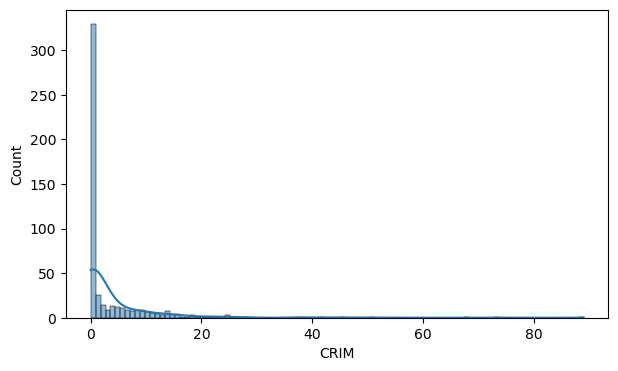

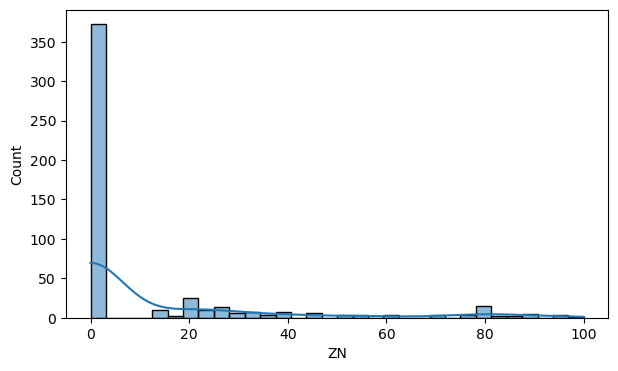

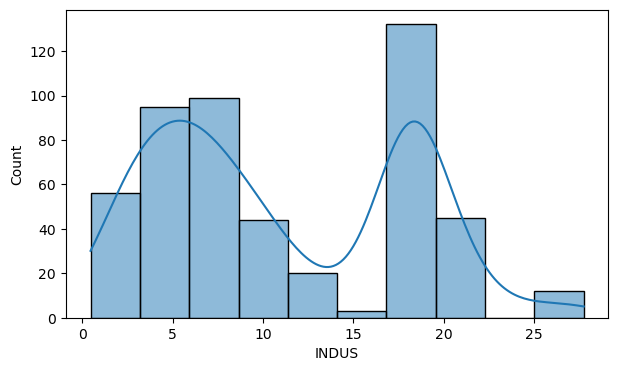

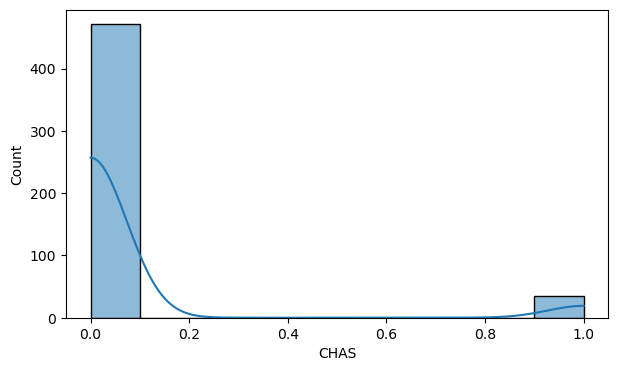

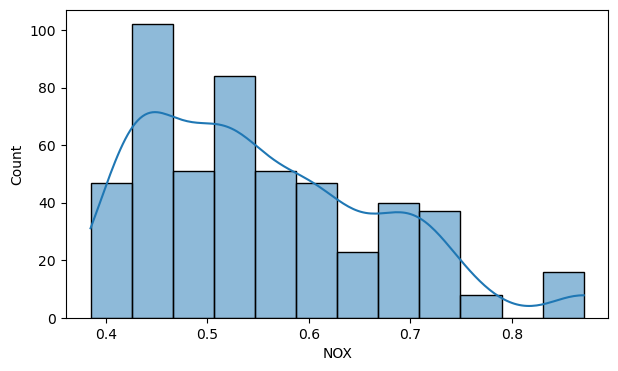

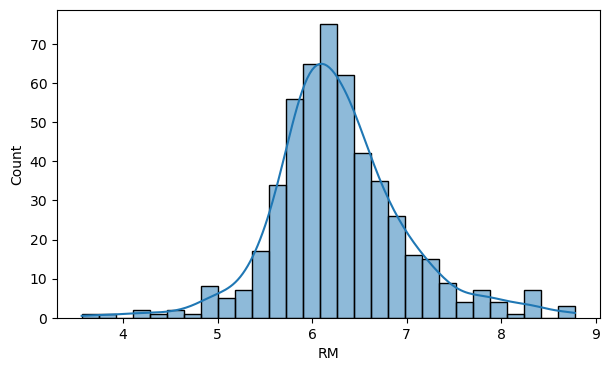

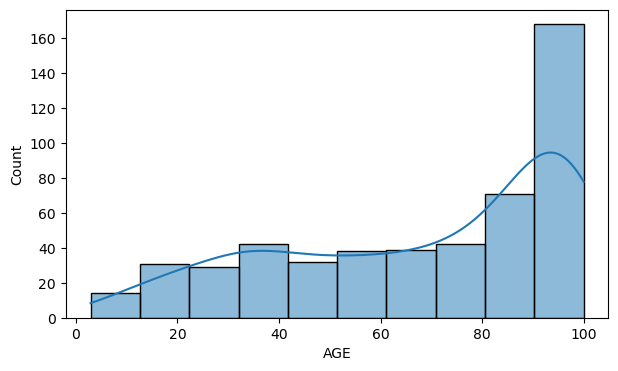

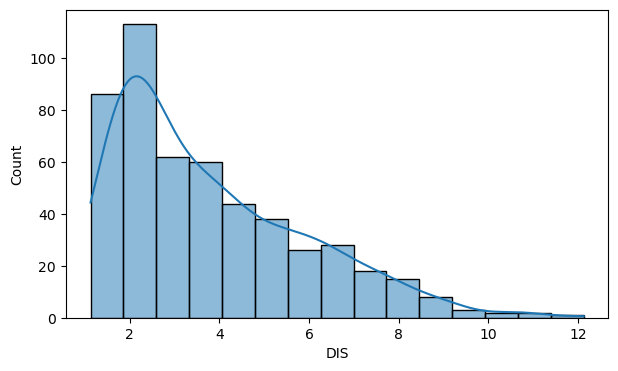

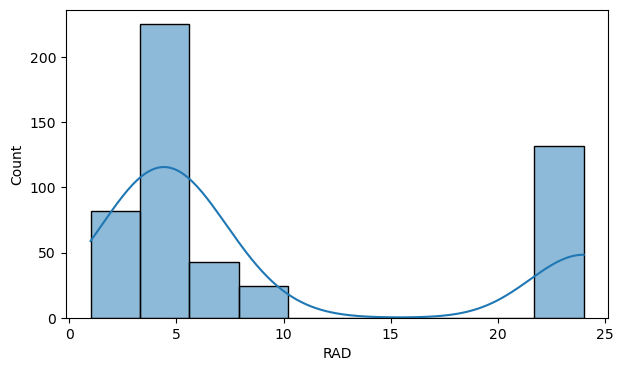

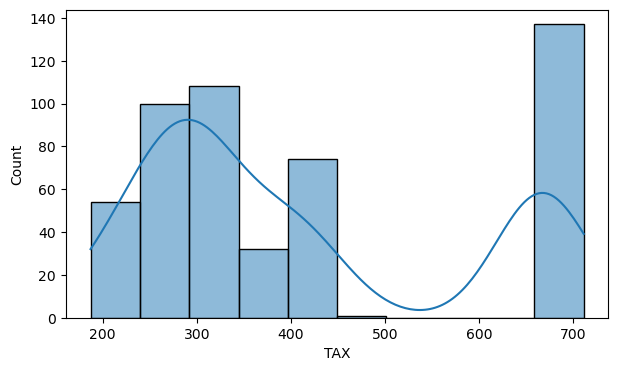

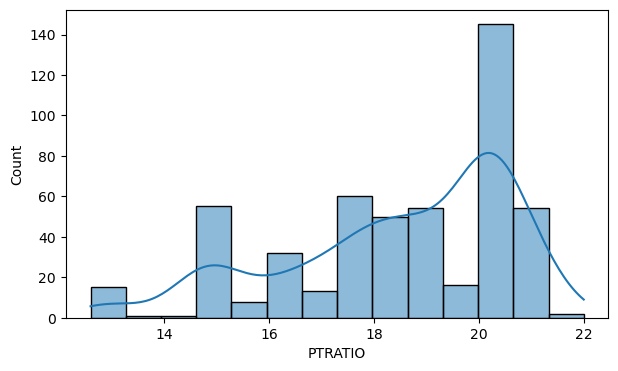

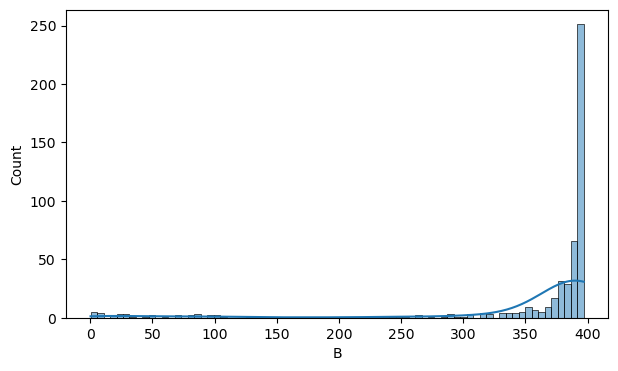

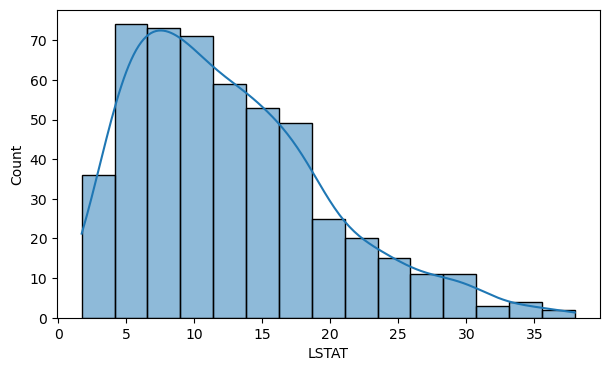

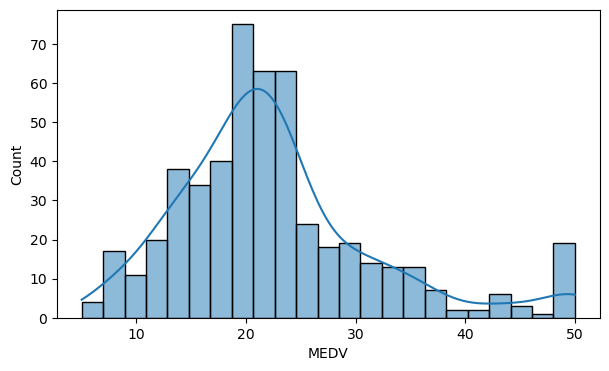

In [5]:
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    
    sns.histplot(data = df, x = i, kde = True)
    
    plt.show()

In [6]:
df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

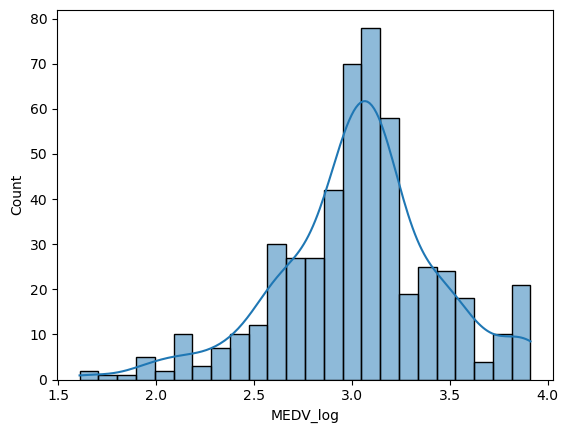

In [7]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

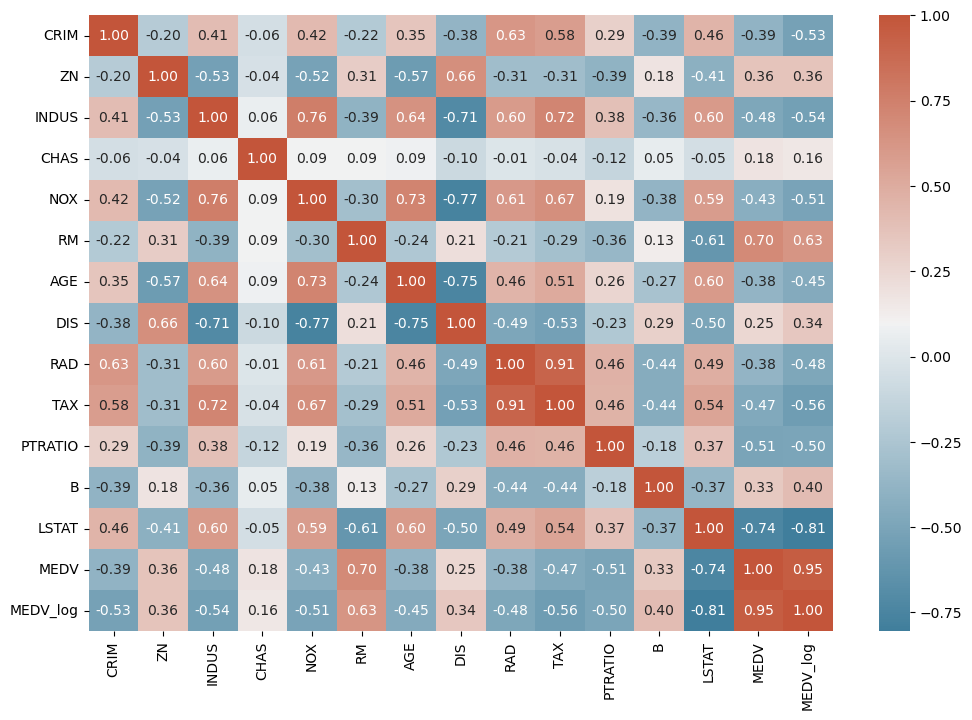

In [8]:
plt.figure(figsize = (12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)
plt.show()

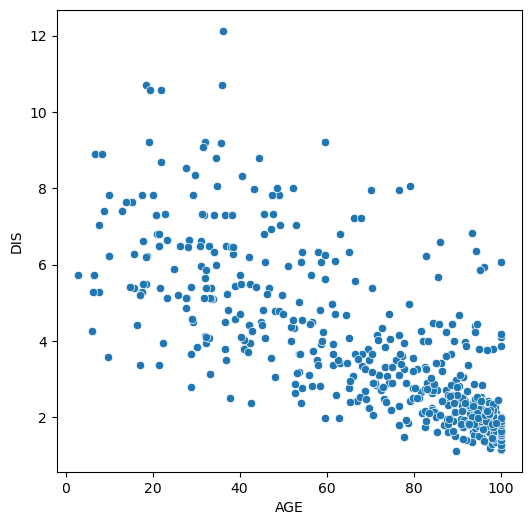

In [9]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
plt.show()

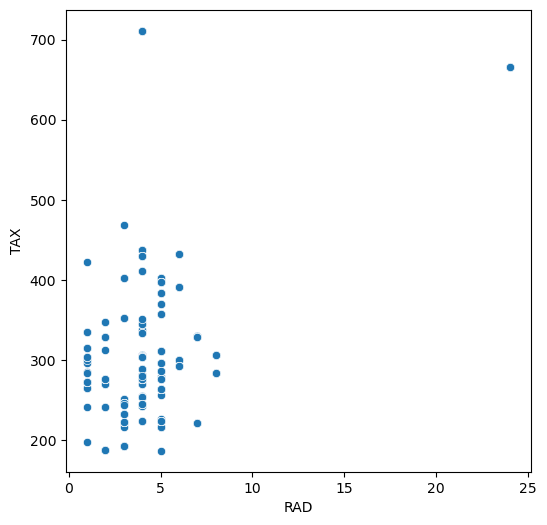

In [10]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()

In [11]:
df1 = df[df['TAX'] < 600]
from scipy.stats import pearsonr
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


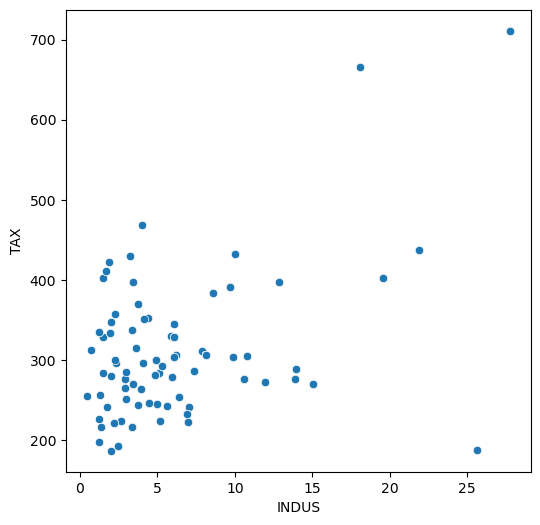

In [12]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
plt.show()

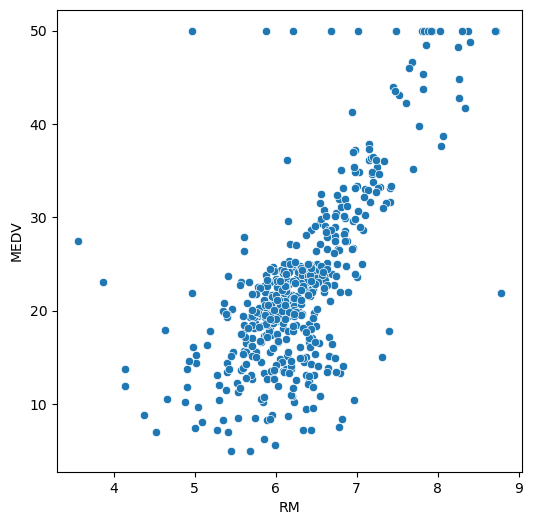

In [13]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

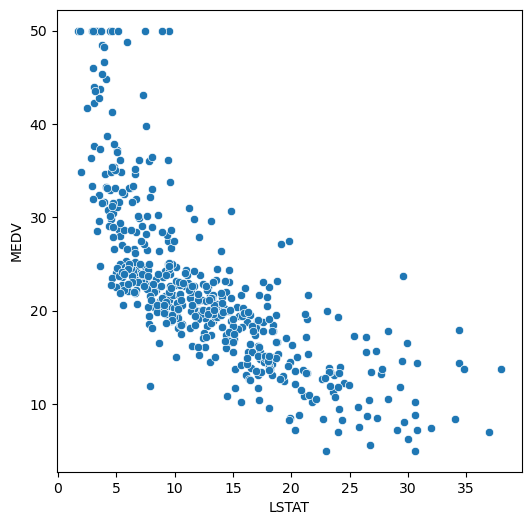

In [14]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)
plt.show()

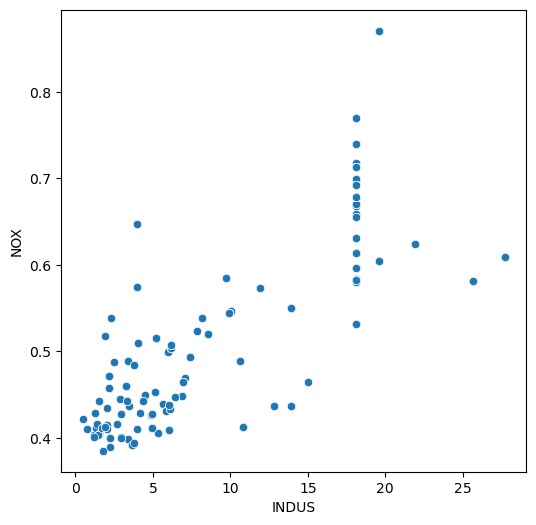

In [15]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)
plt.show()

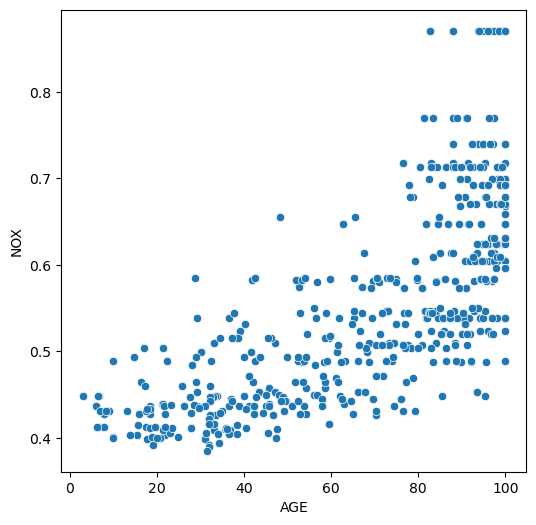

In [16]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'AGE', y = 'NOX', data = df)
plt.show()

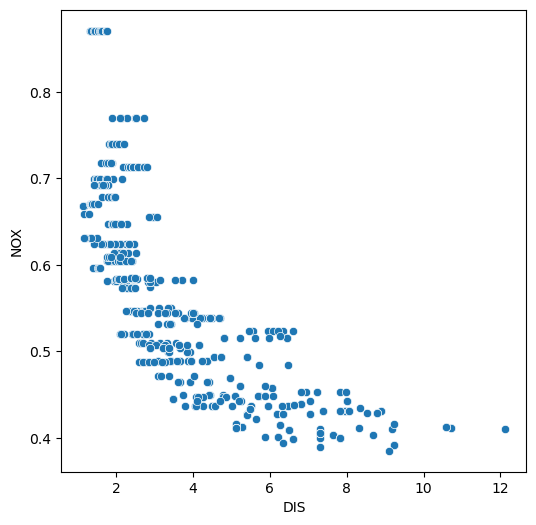

In [17]:
plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'DIS', y = 'NOX', data = df)
plt.show()

In [18]:
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})
X = sm.add_constant(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  585.099960
1      CRIM    1.993439
2        ZN    2.743911
3     INDUS    4.004462
4      CHAS    1.078490
5       NOX    4.430555
6        RM    1.879494
7       AGE    3.155351
8       DIS    4.361514
9       RAD    8.369185
10      TAX   10.194047
11  PTRATIO    1.948555
12        B    1.385213
13    LSTAT    2.926462


In [21]:
_train = X_train.drop(columns = 'TAX')
print(checking_vif(X_train))

    feature         VIF
0     const  585.099960
1      CRIM    1.993439
2        ZN    2.743911
3     INDUS    4.004462
4      CHAS    1.078490
5       NOX    4.430555
6        RM    1.879494
7       AGE    3.155351
8       DIS    4.361514
9       RAD    8.369185
10      TAX   10.194047
11  PTRATIO    1.948555
12        B    1.385213
13    LSTAT    2.926462


In [23]:
model1 = sm.OLS(y_train,X_train).fit()
model1.summary(Y = df['MEDV_log']

X = df.drop(['ZN','AGE','INDUS'], axis=1)

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train,X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     90.52
Date:                Sat, 07 Jun 2025   Prob (F-statistic):          6.99e-102
Time:                        18:46:12   Log-Likelihood:                 82.204
No. Observations:                 354   AIC:                            -136.4
Df Residuals:                     340   BIC:                            -82.24
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5555      0.252     18.103      0.000       4.061       5.050
CRIM          -0.0123      0.002     -7.138      0.000      -0.016      -0.009
ZN             0.0016      0.001      2.213      0.028       0.000       0.003
INDUS          0.0034      0.003      1.118      0.264      -0.003       0.009
CHAS           0.0999      0.039      2.575      0.010       0.024       0.176
NOX           -0.9851      0.186     -5.302      0.000      -1.351      -0.620
RM             0.0545      0.021      2.643      0.009       0.014       0.095
AGE            0.0003      0.001      0.448      0.654      -0.001       0.002
DIS           -0.0516      0.010     -5.073      0.000      -0.072      -0.032
RAD            0.0156      0.003      4.561      0.000       0.009       0.022
TAX           -0.0005      0.000     -2.767      0.006      -0.001      -0.000
PTRATIO       -0.0434      0.007     -6.402      0.000      -0.057      -0.030
B              0.0002      0.000      1.773      0.077   -2.63e-05       0.001
LSTAT         -0.0293      0.002    -11.954      0.000      -0.034      -0.024
==============================================================================
Omnibus:                       37.414   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.597
Skew:                           0.463   Prob(JB):                     7.12e-24
Kurtosis:                       5.524   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
Y = df['MEDV_log']
X = df.drop(['ZN','AGE','INDUS'], axis=1)
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)
model2 = sm.OLS(y_train,X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.855e+29
Date:                Sat, 07 Jun 2025   Prob (F-statistic):               0.00
Time:                        18:46:51   Log-Likelihood:                 11283.
No. Observations:                 354   AIC:                        -2.254e+04
Df Residuals:                     341   BIC:                        -2.249e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.441e-16   8.04e-15     -0.055      0.956   -1.63e-14    1.54e-14
CRIM         3.99e-17    3.7e-17      1.079      0.281   -3.29e-17    1.13e-16
CHAS        8.882e-16   7.08e-16      1.254      0.211   -5.05e-16    2.28e-15
NOX         -1.61e-15   3.24e-15     -0.497      0.620   -7.98e-15    4.76e-15
RM          1.249e-16   3.93e-16      0.318      0.751   -6.48e-16    8.98e-16
DIS        -2.359e-16   1.49e-16     -1.587      0.113   -5.28e-16    5.65e-17
RAD        -4.857e-17   6.03e-17     -0.805      0.421   -1.67e-16    7.01e-17
TAX         9.433e-18    3.1e-18      3.045      0.003    3.34e-18    1.55e-17
PTRATIO    -9.021e-17   1.21e-16     -0.744      0.457   -3.29e-16    1.48e-16
B           7.806e-18   2.47e-18      3.167      0.002    2.96e-18    1.27e-17
LSTAT               0   5.02e-17          0      1.000   -9.87e-17    9.87e-17
MEDV        4.163e-17   8.66e-17      0.481      0.631   -1.29e-16    2.12e-16
MEDV_log       1.0000   2.21e-15   4.53e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                       22.016   Durbin-Watson:                   0.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.859
Skew:                          -0.639   Prob(JB):                     4.00e-06
Kurtosis:                       2.776   Cond. No.                     2.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
residuals = model2.resid
np.mean(residuals)

-3.192675251605676e-15

In [26]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [27]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 0.001155754378355762), ('p-value', 0.9999999999999999)]

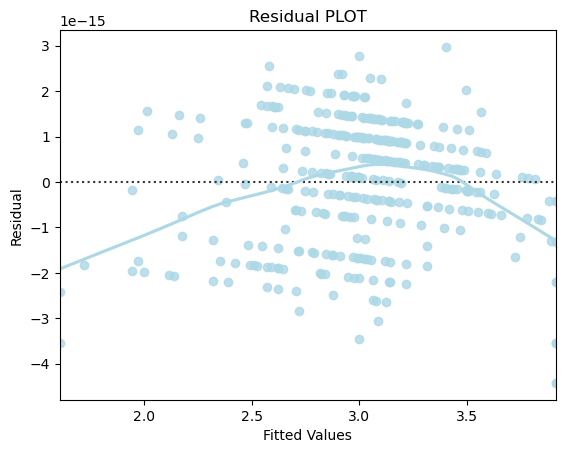

In [28]:
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

<Axes: ylabel='Count'>

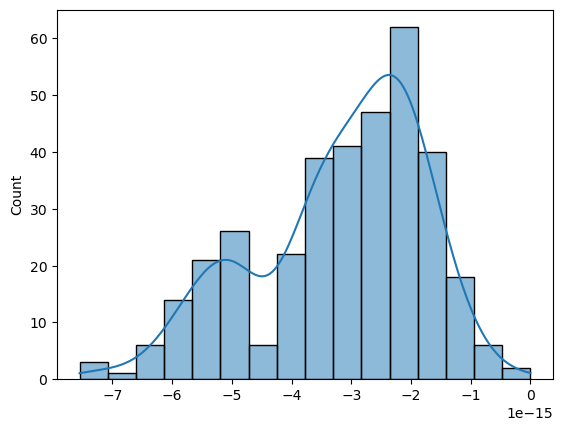

In [29]:
sns.histplot(residuals, kde = True)

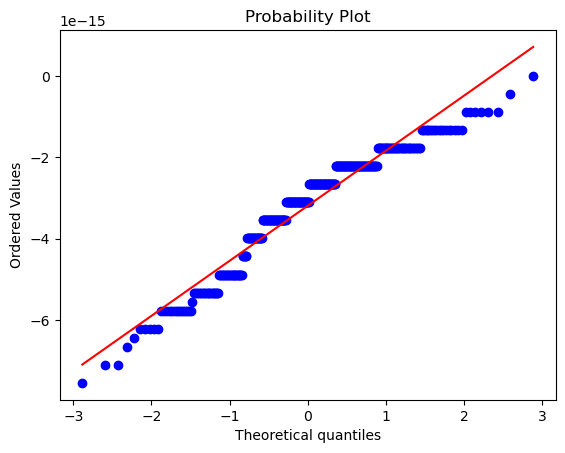

In [30]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

In [31]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

## R2
from sklearn.metrics import r2_score


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  

    Data          RMSE           MAE          MAPE   r2
0  Train  3.478592e-15  3.192675e-15  1.094103e-13  1.0
1   Test  3.461567e-15  3.188970e-15  1.083653e-13  1.0


In [32]:
from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 1.000 (+/- 0.000)
Mean Squared Error: 0.000 (+/- 0.000)


In [33]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,-4.440892e-16
1,CRIM,3.989864e-17
2,CHAS,8.881784e-16
3,NOX,-1.609823e-15
4,RM,1.249001e-16
5,DIS,-2.359224e-16
6,RAD,-4.857226e-17
7,TAX,9.432559e-18
8,PTRATIO,-9.020562e-17
9,B,7.806256e-18


In [34]:

coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,-4.440892e-16
1,CRIM,3.989864e-17
2,CHAS,8.881784e-16
3,NOX,-1.609823e-15
4,RM,1.249001e-16
5,DIS,-2.359224e-16
6,RAD,-4.857226e-17
7,TAX,9.432559e-18
8,PTRATIO,-9.020562e-17
9,B,7.806256e-18
